In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
dftest = pd.read_csv('C:/MSDA/data245/Coding/data/test.csv')
df = pd.read_csv('C:/MSDA/data245/Coding/data/train.csv')

In [100]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [101]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [102]:
sum(df.Survived)

342

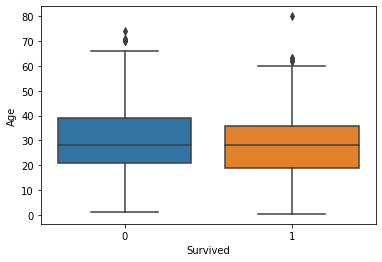

In [103]:
sns.boxplot(x= df.Survived, y = df.Age)

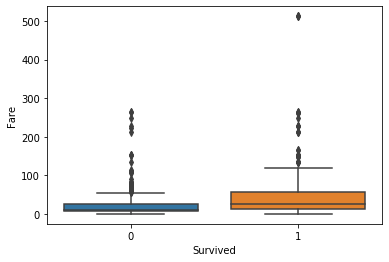

In [104]:
sns.boxplot(x= df.Survived, y = df.Fare)

In [105]:
def normalization(col):
    min_ = min(col)
    max_ = max(col)
    mean = np.mean(col)
    sd = np.std(col)
    return [(i-mean) / sd if not sd ==0 else i-mean for i in col]
def data_cleaning(df):
    df['EmbarkedS'] = pd.Series(np.zeros(len(df)))
    df['EmbarkedC'] = pd.Series(np.zeros(len(df)))
    df['EmbarkedQ'] = pd.Series(np.zeros(len(df)))
    df['Pclass1'] = pd.Series(np.zeros(len(df)))
    df['Pclass2'] = pd.Series(np.zeros(len(df)))
    df['Pclass3'] = pd.Series(np.zeros(len(df)))
    df['Sexf'] = pd.Series(np.zeros(len(df)))
    df['Sexm'] = pd.Series(np.zeros(len(df)))
    print(df.columns)
    for i in range(len(df)):
        if df.Embarked[i] == 'S':
            df.EmbarkedS[i] = 1
        elif df.Embarked[i] == 'C':
            df.EmbarkedC[i] = 1
        elif df.Embarked[i] == 'Q':
            df.EmbarkedQ[i] = 1        
    for i in range(len(df)):
        if df.Pclass[i] == 1:
            df.Pclass1[i] = 1
        elif df.Pclass[i] == 2:
            df.Pclass2[i] = 1
        elif df.Pclass[i] == 3:
            df.Pclass3[i] = 1
    for i in range(len(df)):
        if df.Sex[i] == 'female':
            df.Sexf[i] = 1
        elif df.Sex[i] == 'male':
            df.Sexm[i] = 1
    df.drop(columns=['PassengerId','Name','Ticket','Cabin', 'Embarked', 'Pclass', 'Sex'], inplace = True) # drop Cabin ?
    try:
        df = df[['Age', 'SibSp', 'Parch', 'Fare', 'EmbarkedS', 'EmbarkedC', 'EmbarkedQ',
                 'Pclass1', 'Pclass2', 'Pclass3', 'Sexf', 'Sexm', 'Survived']]
    except:
        pass
    df = df.fillna(0)
    col = df.columns
    for i in col[:-8]:
        df[i] = normalization(df[i])
    return df 

df = data_cleaning(df)
df.describe()

sns.heatmap(df.corr())
# to find the relationship between features. 

In [107]:
df.corr()

,Age,SibSp,Parch,Fare,EmbarkedS,EmbarkedC,EmbarkedQ,Pclass1,Pclass2,Pclass3,Sexf,Sexm,Survived
Age,1.000000,-0.184664,-0.048786,0.135516,0.140578,0.001246,-0.237586,0.293485,0.124510,-0.354201,-0.024978,0.024978,0.010539
SibSp,-0.184664,1.000000,0.414838,0.159651,0.070941,-0.059528,-0.026354,-0.054582,-0.055932,0.092548,0.114631,-0.114631,-0.035322
Parch,-0.048786,0.414838,1.000000,0.216225,0.063036,-0.011069,-0.081228,-0.017633,-0.000734,0.015790,0.245489,-0.245489,0.081629
Fare,0.135516,0.159651,0.216225,1.000000,-0.166603,0.269335,-0.117216,0.591711,-0.118557,-0.413333,0.182333,-0.182333,0.257307
EmbarkedS,0.140578,0.070941,0.063036,-0.166603,1.000000,-0.778359,-0.496624,-0.170379,0.192061,-0.009511,-0.125722,0.125722,-0.155660
EmbarkedC,0.001246,-0.059528,-0.011069,0.269335,-0.778359,1.000000,-0.148258,0.296423,-0.125416,-0.153329,0.082853,-0.082853,0.168240
EmbarkedQ,-0.237586,-0.026354,-0.081228,-0.117216,-0.496624,-0.148258,1.000000,-0.155342,-0.127301,0.237449,0.074115,-0.074115,0.003650
Pclass1,0.293485,-0.054582,-0.017633,0.591711,-0.170379,0.296423,-0.155342,1.000000,-0.288585,-0.626738,0.098013,-0.098013,0.285904
Pclass2,0.124510,-0.055932,-0.000734,-0.118557,0.192061,-0.125416,-0.127301,-0.288585,1.000000,-0.565210,0.064746,-0.064746,0.093349
Pclass3,-0.354201,0.092548,0.015790,-0.413333,-0.009511,-0.153329,0.237449,-0.626738,-0.565210,1.000000,-0.137143,0.137143,-0.322308


In [108]:
def logistic(row, para):
    exponent = 0
    for i, j in zip(para, row):
        exponent += i*j
    return 1/(1+np.exp(-exponent))

In [112]:
def LR(X, Y, lr):
    para = [-0.29337668, -0.30149844, -0.0455484 ,  0.14572016,
       -3.16498884, -2.73268084, -3.03507468,  2.43291844,  1.77705346,
        0.56724555, 1, 1, 1.15721329] # last one is w0
    for j in range(100):
        pre = np.zeros(len(X)) # set predicted results as 0s
        X['w0'] = np.ones(len(X)) # add w0
        last_para = para.copy()
        print('iterate', j, end = ' ')
        for i in range(len(X)):
            pre[i] = logistic(X.iloc[i].values.tolist(), para)
        gradient_descent = X.T.dot(pre - Y)
        #print('pre', pre, 'Y', Y, pre - Y)
        para = para - lr * gradient_descent
        if j%10 == 0: # print the results every 10 times
            print()
            #print(para)
            #print(errorD)
            #print(sum(pre - Y))
        if round(para[0], 6) == round(last_para[0],6) and round(para[1], 6) == round(last_para[1],6): # if the weights did not change, make it the final weights.
            return para
            break
    return para

In [113]:
def predict(query, para, threshold = 0.5):
    pred = logistic(query, para)
    #return pred
    if pred > threshold or pred == threshold:
        return 1
    else:
        return 0
def acc(X, para, threshold):
    #X = data_cleaning(X)
    predicted = list(np.zeros(len(X))) 
    for i in range(len(X)):
        predicted[i] = predict(X.iloc[i],para, threshold) 
    return predicted
def acc_score(testY, para, threshold):
    pre = acc(testX, para, threshold)
    df0 = pd.DataFrame()
    df0['Y'] = pd.Series(testY)
    df0['predicted'] = pd.Series(pre)
    sum_acc = 0
    for i, j in zip(testY, pre):
        if i == j:
            sum_acc += 1
    return sum_acc/len(testY)*100

In [114]:
# Train the model
X = df.iloc[:720, :-1]
Y = df.iloc[:720, -1]
para = LR(X,Y, 0.001)

iterate 0 
iterate 1 iterate 2 iterate 3 iterate 4 iterate 5 iterate 6 iterate 7 iterate 8 iterate 9 iterate 10 
iterate 11 iterate 12 iterate 13 iterate 14 iterate 15 iterate 16 iterate 17 iterate 18 iterate 19 iterate 20 
iterate 21 iterate 22 iterate 23 iterate 24 iterate 25 iterate 26 iterate 27 iterate 28 iterate 29 iterate 30 
iterate 31 iterate 32 iterate 33 iterate 34 iterate 35 iterate 36 iterate 37 iterate 38 iterate 39 iterate 40 
iterate 41 iterate 42 iterate 43 iterate 44 iterate 45 iterate 46 iterate 47 iterate 48 iterate 49 iterate 50 
iterate 51 iterate 52 iterate 53 iterate 54 iterate 55 iterate 56 iterate 57 iterate 58 iterate 59 iterate 60 
iterate 61 iterate 62 iterate 63 iterate 64 iterate 65 iterate 66 iterate 67 iterate 68 iterate 69 iterate 70 
iterate 71 iterate 72 iterate 73 iterate 74 iterate 75 iterate 76 iterate 77 iterate 78 iterate 79 iterate 80 
iterate 81 iterate 82 iterate 83 iterate 84 iterate 85 iterate 86 iterate 87 iterate 88 iterate 89 iterate 90 

In [115]:
testX = df.iloc[720:, :-1]
testY = df.iloc[720:, -1]

In [116]:
acc_score(testY, para, 0.5)

81.87134502923976

In [117]:
# to find a better threshold
listacc = list()
indexdf = range(100)
for i in indexdf:
    listacc.append(acc_score(testY, para, i/100))

In [118]:
listacc.index(max(listacc))

62

Text(0.5, 1.0, 'Accuracy change with threshold')

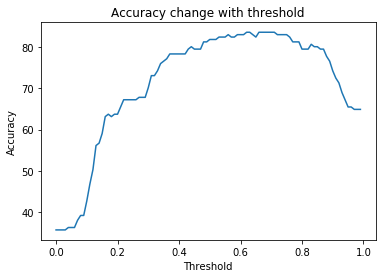

In [119]:
plt.plot(np.array(indexdf)/100, listacc)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy change with threshold')

In [120]:
dftest = pd.read_csv('C:/MSDA/data245/Coding/data/test.csv')

testX = data_cleaning(dftest)
#testY = df.iloc[:, -1]
pre = acc(testX, para, 0.5)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'EmbarkedS', 'EmbarkedC',
       'EmbarkedQ', 'Pclass1', 'Pclass2', 'Pclass3', 'Sexf', 'Sexm'],
      dtype='object')


C:\Users\Rui7803\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Rui7803\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Rui7803\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Rui7803\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning:

In [68]:
dftest['Survived'] = pd.Series(pre)
dftest1 = pd.DataFrame()
dftest1['PassengerId'] = pd.Series(range(892, 892 + len(dftest)))
dftest1['Survived'] = dftest['Survived']
dftest1.reset_index(drop=True, inplace=True)
dftest1.to_csv('c:\msda\data245\coding\predicted.csv', index=False)
dftest1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [69]:
para.values

array([-0.29344311, -0.30145546, -0.04546701,  0.14560377, -1.66061839,
       -3.2779874 , -3.57928877,  1.93587389,  1.27968201,  0.06975496,
        1.61376341, -1.10567   , -0.3346933 ])